# Описание работы

### Цель - получить актуальную информацию о погоде в каждом городе и представить графики температур по областям

Сайт, с которого получены данные, - yandex.by

Выполнив все ячейки:
1. Создаётся папка city_weather (там, где находится этот notebook).
2. В папке city_weather создаются папки с названиями каждого города. 
3. В каждую папку с названиями городов записываются актуальные погодные данные(название города, область, температура, описание, ветер, влажность, давление).
4. В корневую папку city_weather записывается csv-файл с полученными данными.
5. В корневую папку записываются как png-файлы графики температур по каждой области.

In [1]:
from bs4 import BeautifulSoup
import urllib3
import os

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
http = urllib3.PoolManager()

url = 'https://yandex.by'
responce = http.request('GET', url+'/pogoda/region/149')
soup = BeautifulSoup(responce.data, 'html.parser')
result = dict()
main_dir_name = 'city_weather'
os.mkdir(main_dir_name)
result['city'], result['temp'], result['desc'], result['region'] = [], [], [], []
for link in soup.find_all("a", {"class": "place-list__item-name"}):
    os.mkdir(f'{main_dir_name}/{link.text}')
    responce_city = http.request('GET', url+link.get('href'))
    soup = BeautifulSoup(responce_city.data, 'html.parser')
    temp = soup.find_all('span', {"class": "temp__value"})[0]
    desc = soup.find('div', {"class": "link__condition day-anchor i-bem"})
    region = soup.find_all('span', {"class": "breadcrumbs__title"})[1]
    winds = soup.find_all('div', {"class": "term__value"})
    with open(f'{main_dir_name}/{link.text}/info.txt', "w", encoding="utf-8") as text_file:
        text_file.write(f"Город: {link.text}"+'\n')
        text_file.write(region.text+'\n')
        text_file.write(f"Температура: {temp.text}"+'\n')
        text_file.write(f"Описание: {desc.text}"+'\n')
        for wind in winds[2:5]:
            text_file.write(wind.get('aria-label')+'\n')
    
    result['city'].append(link.text)
    result['temp'].append(temp.text)
    result['desc'].append(desc.text)
    result['region'].append(region.text)

In [2]:
import pandas as pd

df = pd.DataFrame(result)
df = df.set_index('city')

In [3]:
df.to_csv(f'{main_dir_name}/data.csv', encoding='utf-8-sig') 

In [4]:
df['temp'] = df['temp'].str.replace('−', '-').astype(int)

In [5]:
df.dtypes

temp       int32
desc      object
region    object
dtype: object

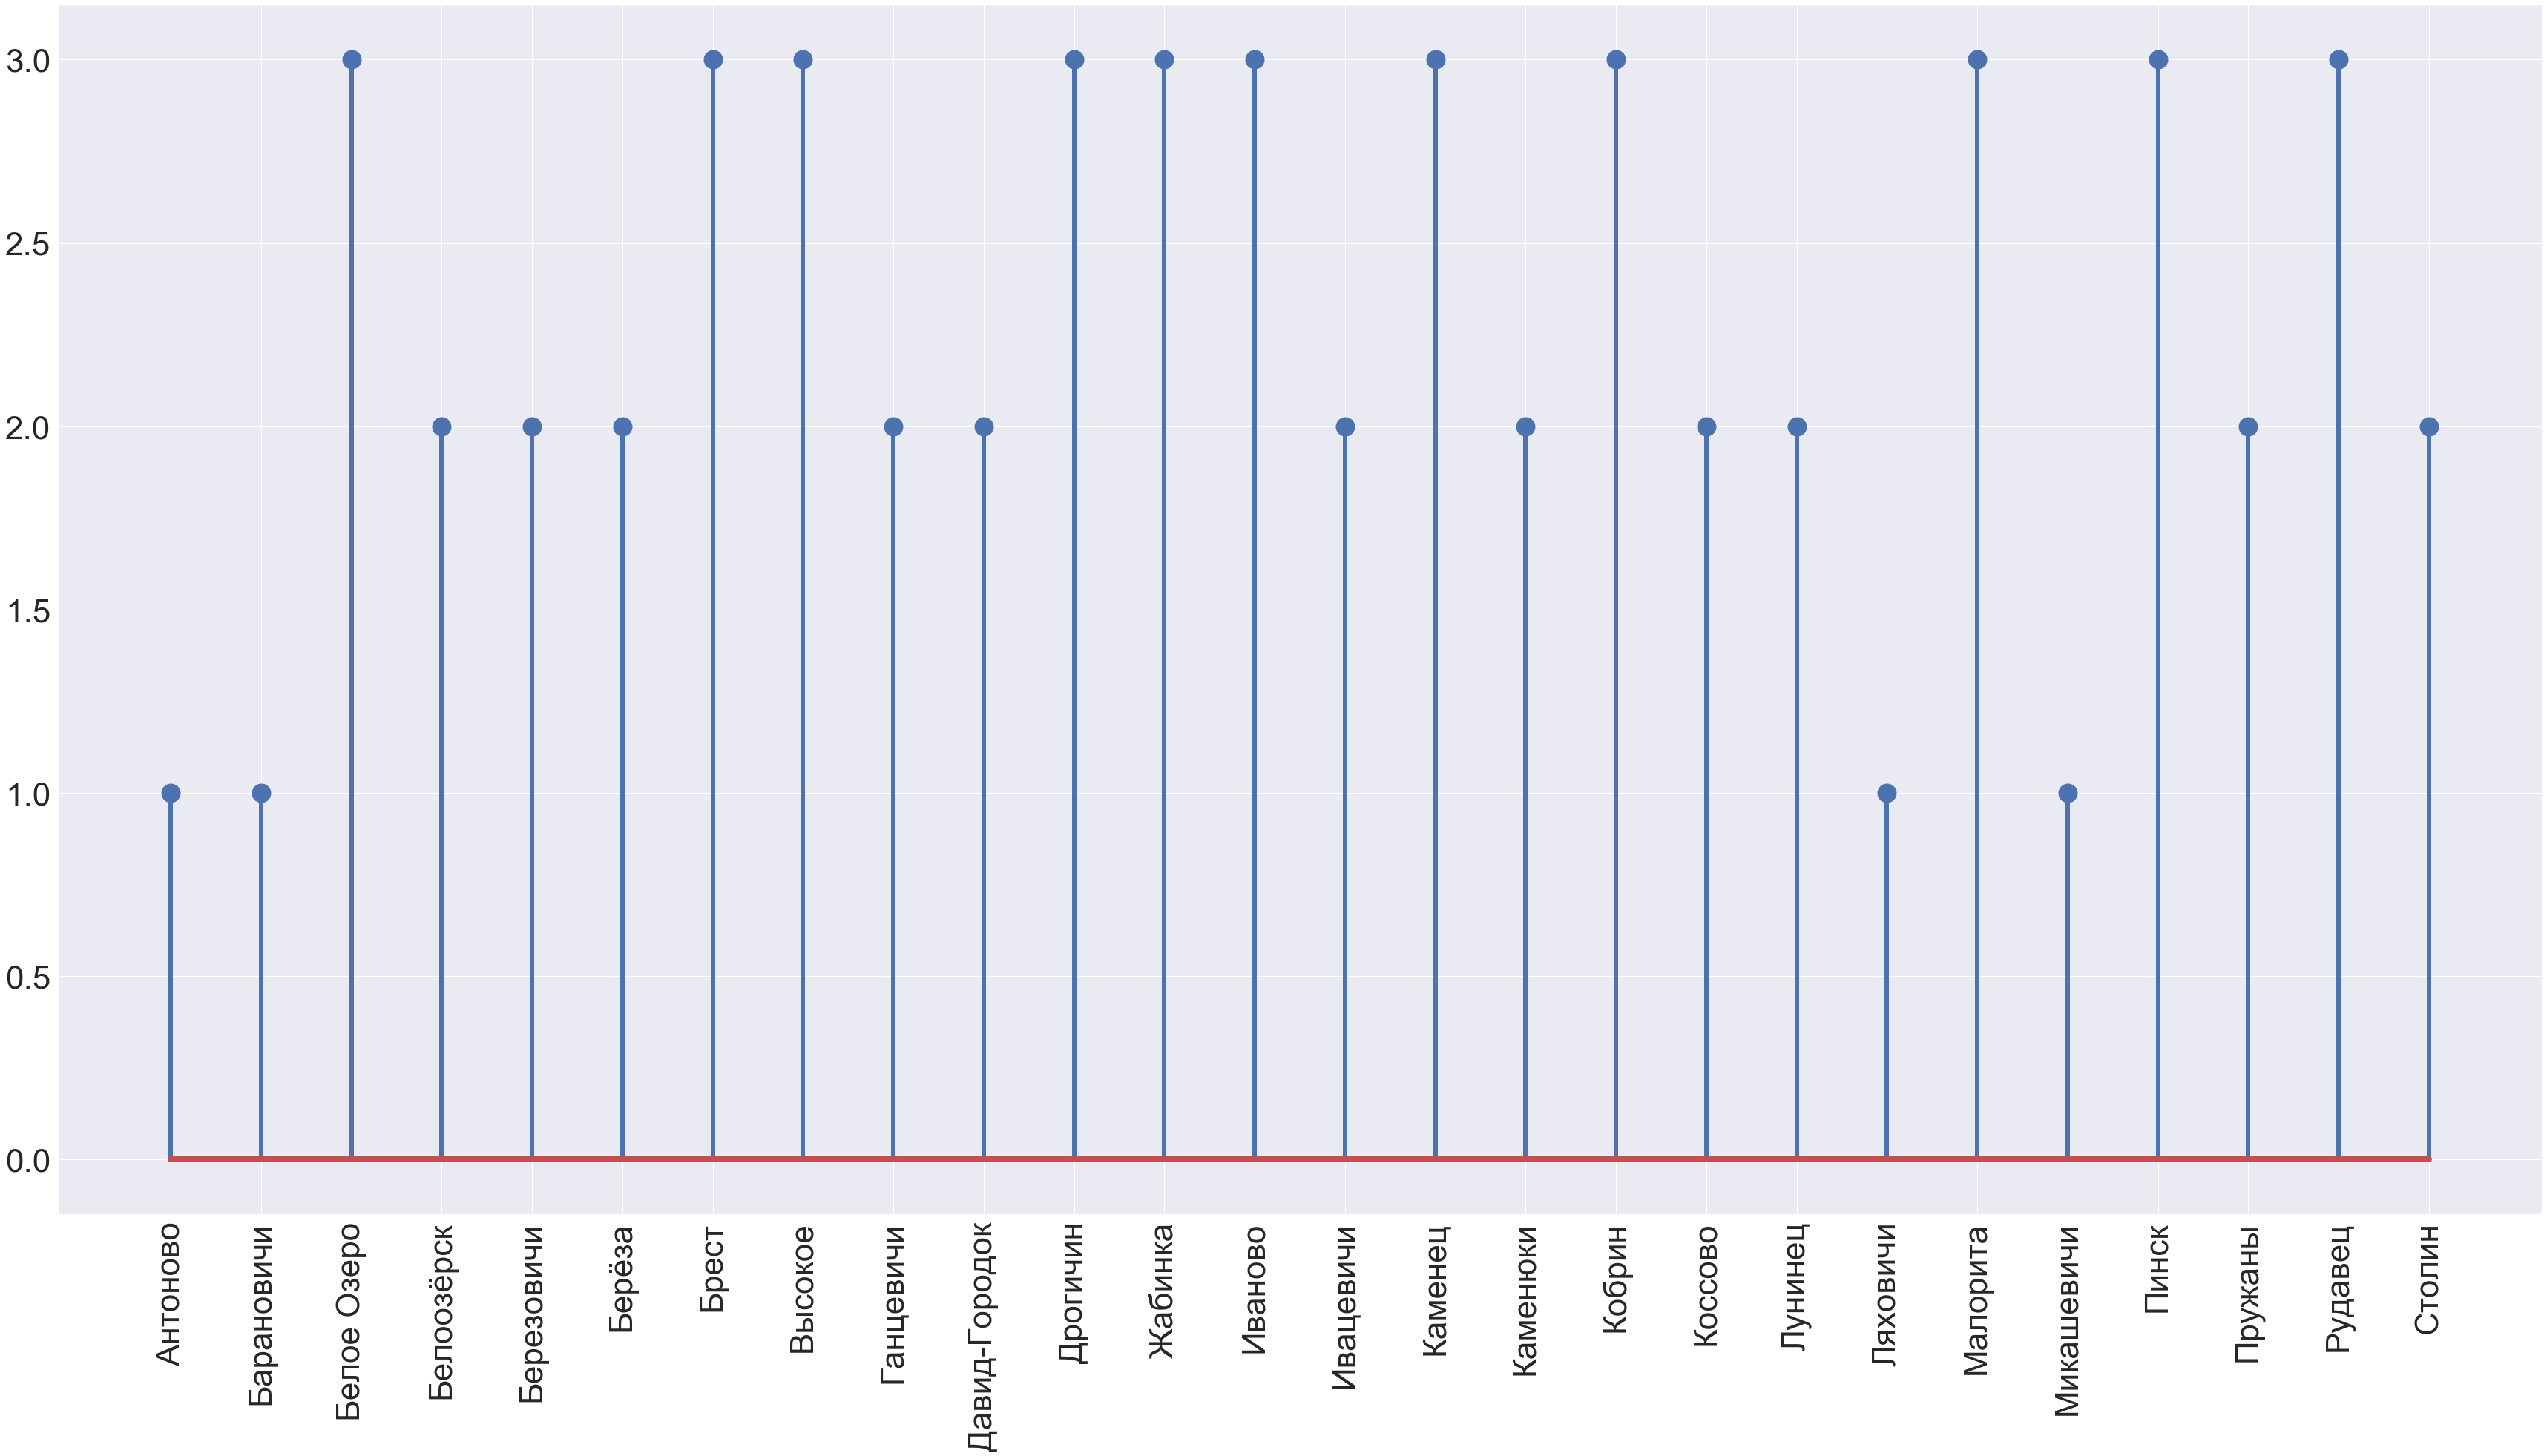

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_brest = df[df['region'] == 'Брестская область']

sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(60, 30))
plt.xticks(rotation=90)
(markerLines, stemLines, baseLines) = plt.stem(df_brest.index, df_brest['temp'], use_line_collection=True)
plt.setp(markerLines, markersize=25)
plt.setp(stemLines, linewidth=6)
plt.setp(baseLines, linewidth=8)
fig.savefig(f'{main_dir_name}/temp_brest.png')

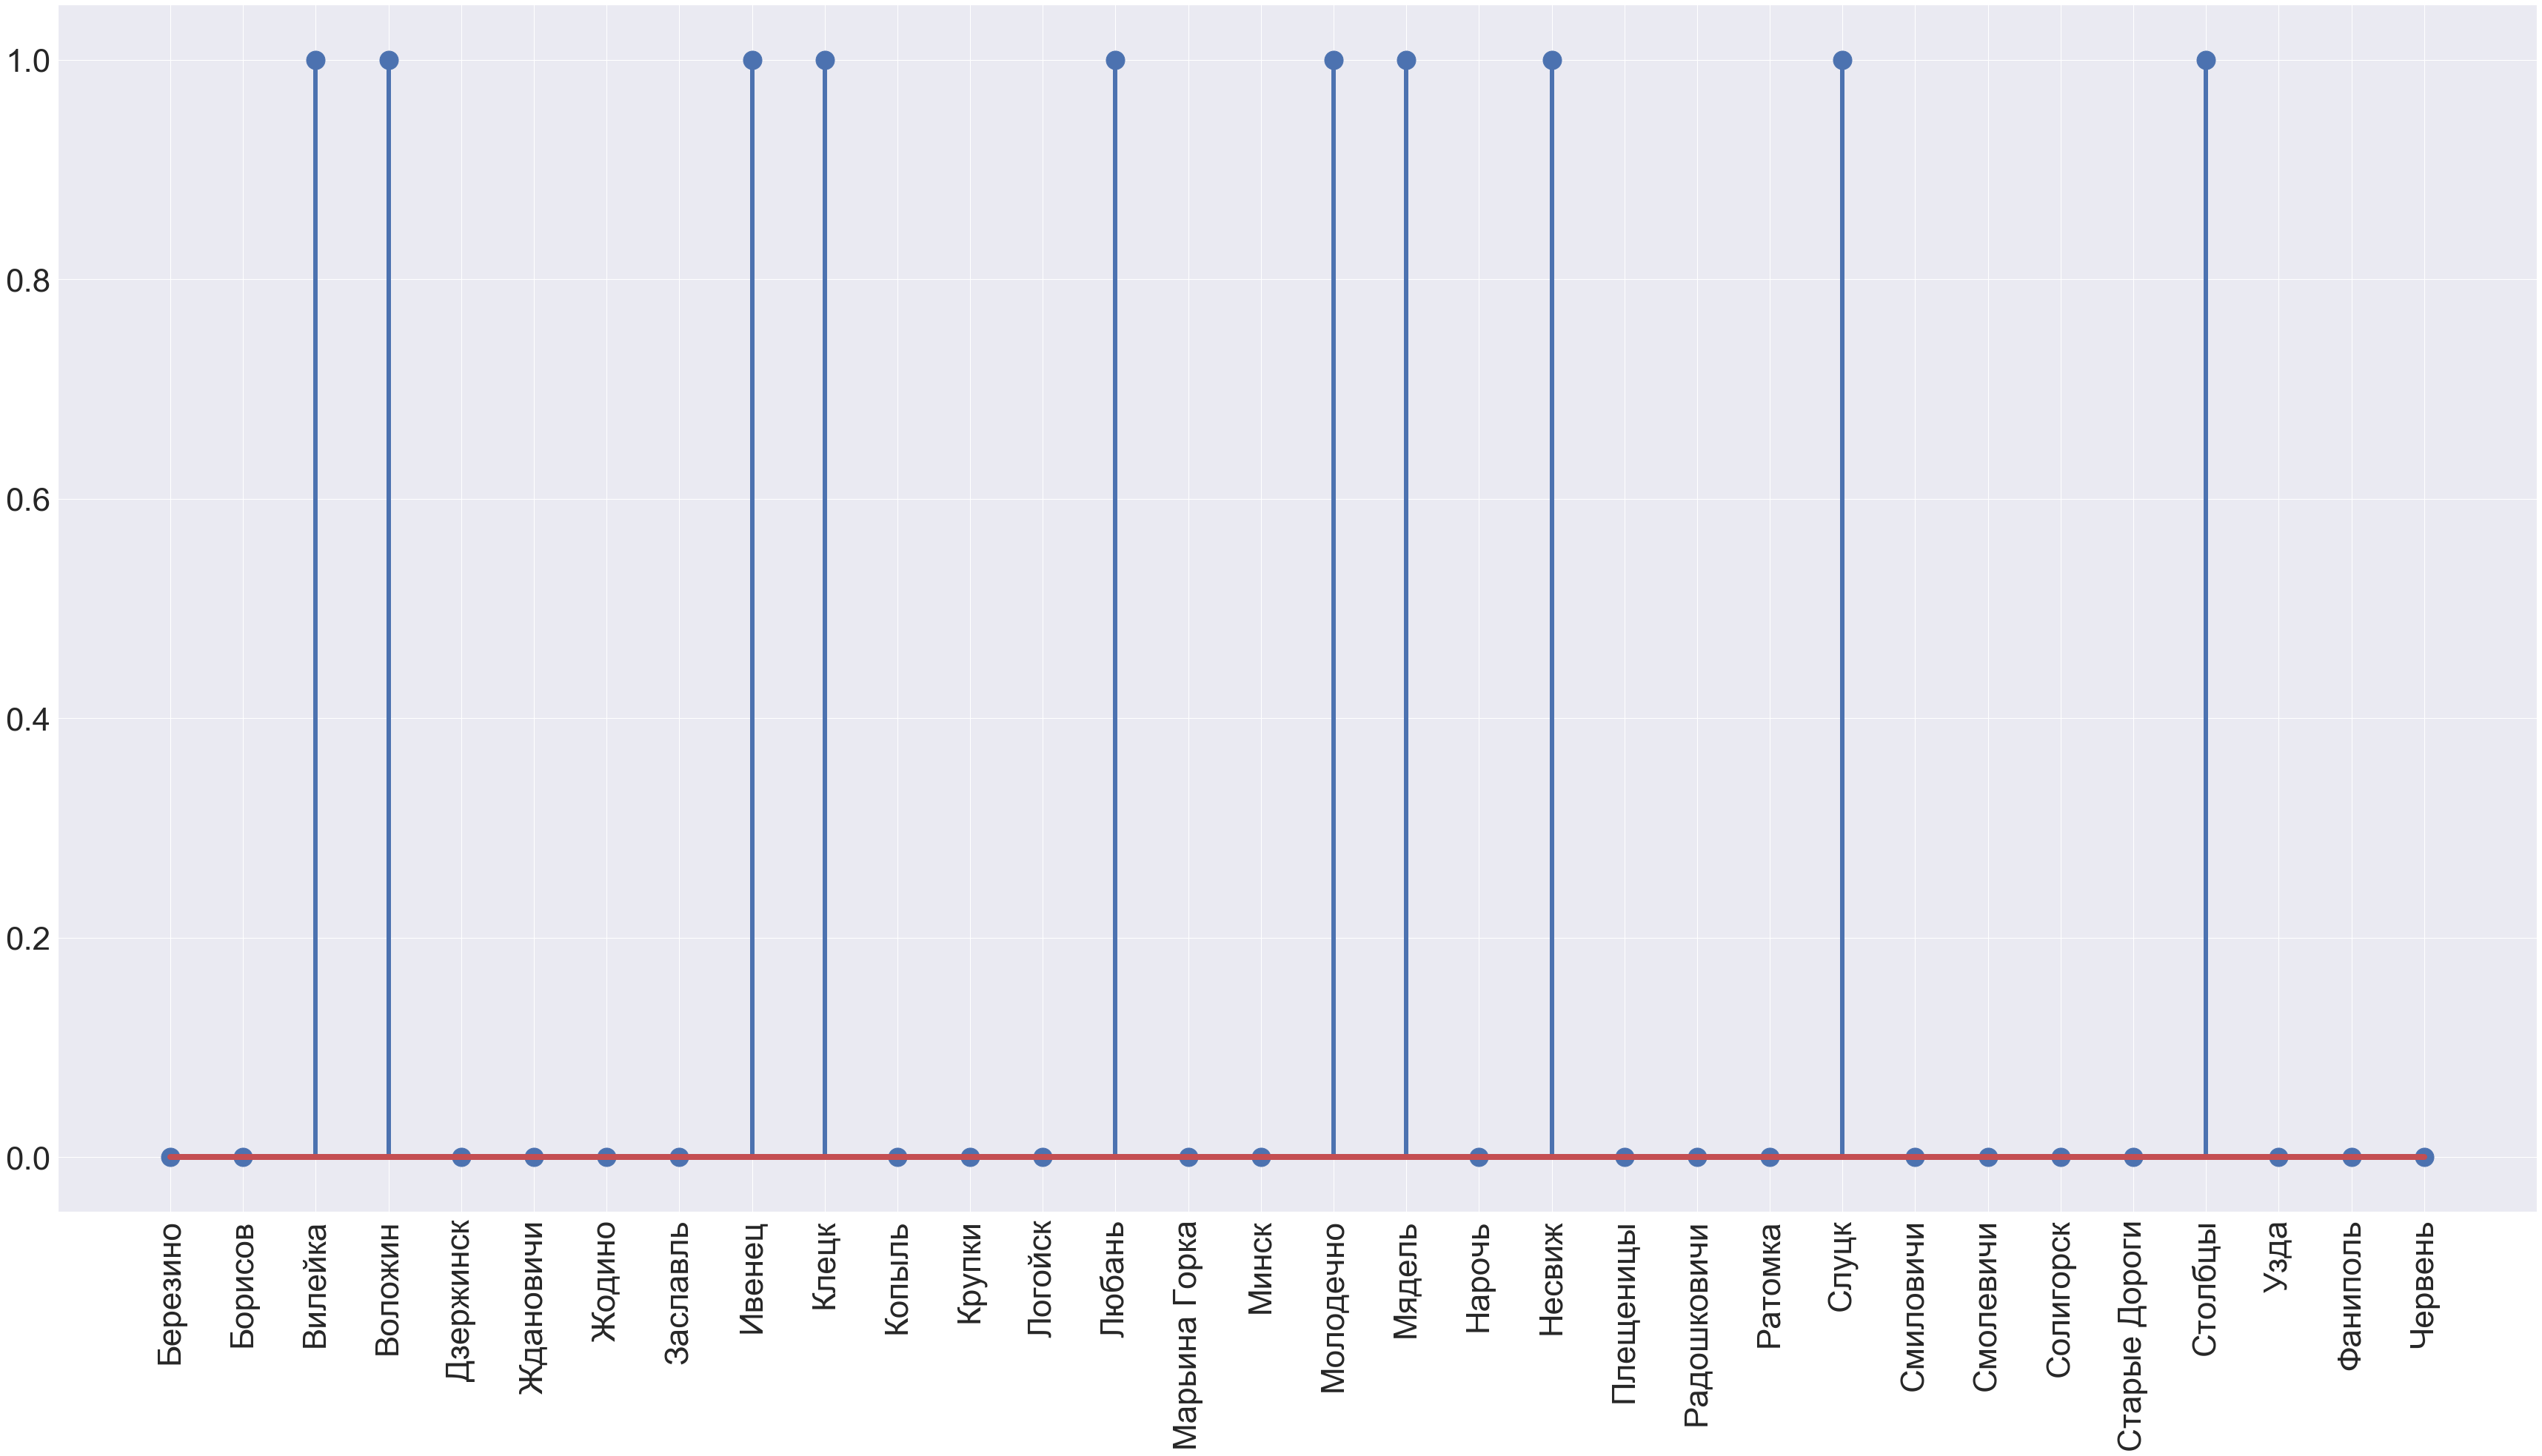

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_minsk = df[df['region'] == 'Минская область']

sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(60, 30))
plt.xticks(rotation=90)
(markerLines, stemLines, baseLines) = plt.stem(df_minsk.index, df_minsk['temp'], use_line_collection=True)
plt.setp(markerLines, markersize=25)
plt.setp(stemLines, linewidth=6)
plt.setp(baseLines, linewidth=8)
fig.savefig(f'{main_dir_name}/temp_minsk.png')

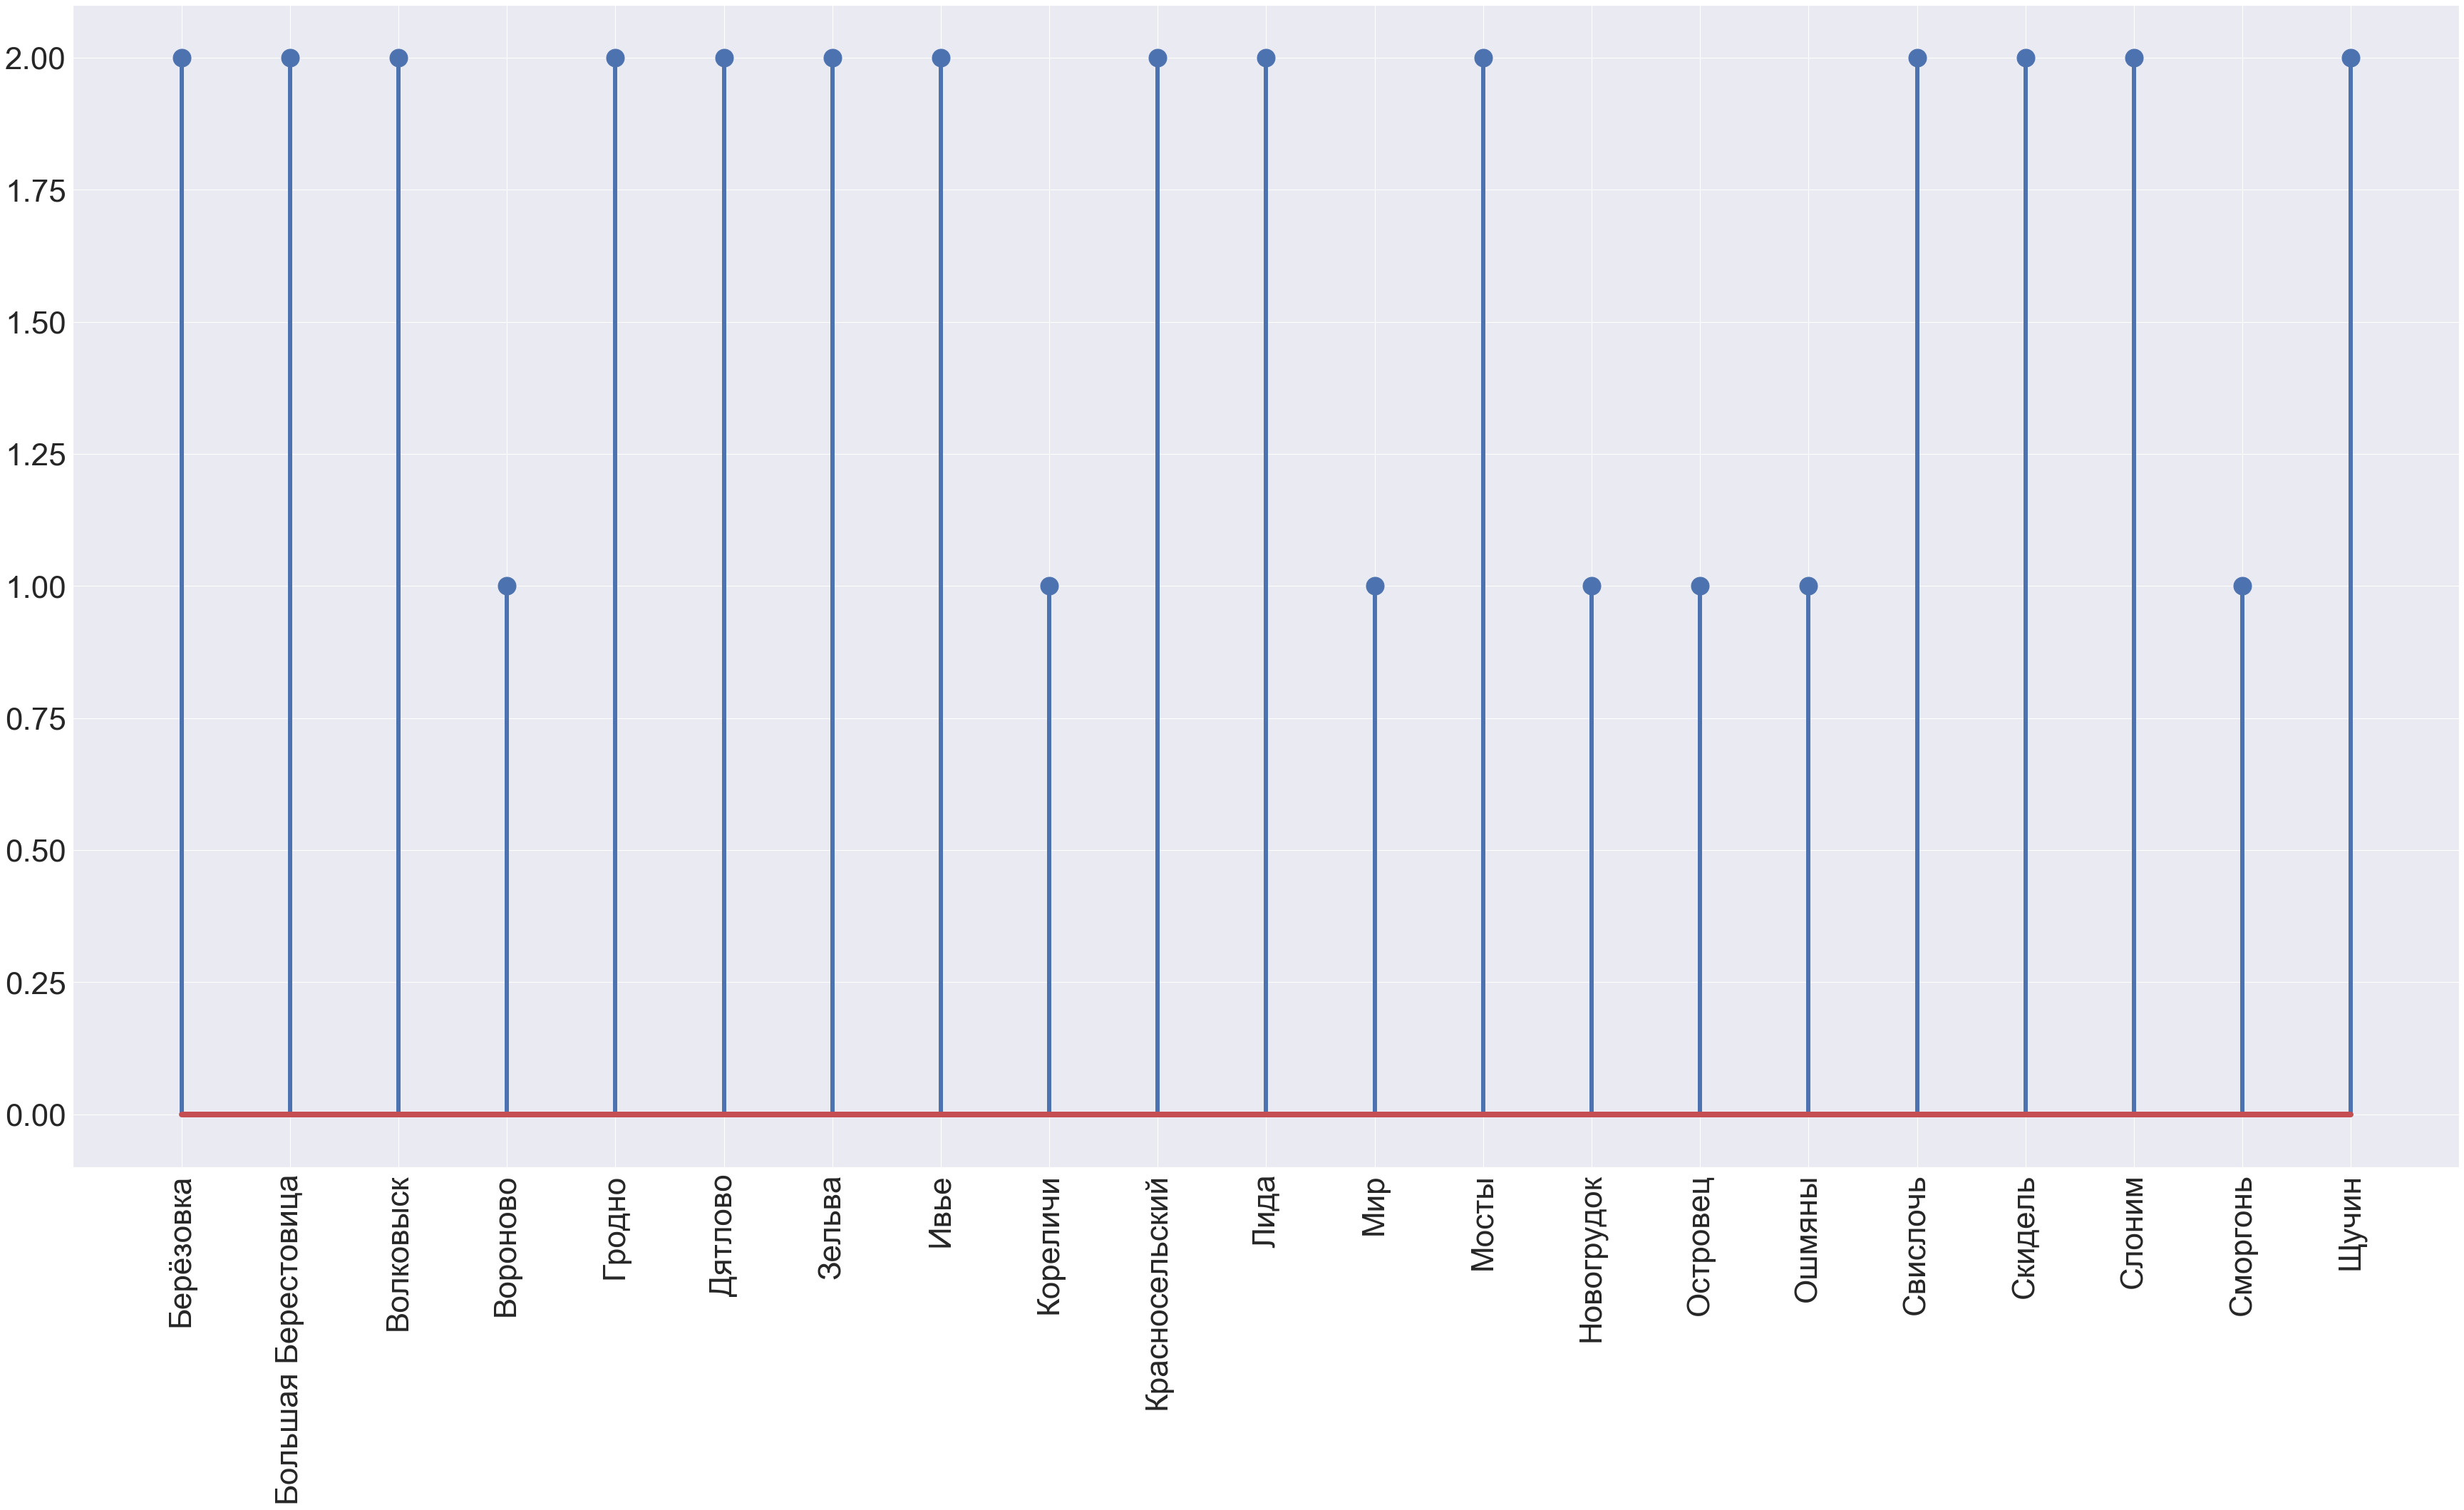

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df_grodno = df[df['region'] == 'Гродненская область']

sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(60, 30))
plt.xticks(rotation=90)
(markerLines, stemLines, baseLines) = plt.stem(df_grodno.index, df_grodno['temp'], use_line_collection=True)
plt.setp(markerLines, markersize=25)
plt.setp(stemLines, linewidth=6)
plt.setp(baseLines, linewidth=8)
fig.savefig(f'{main_dir_name}/temp_grodno.png')

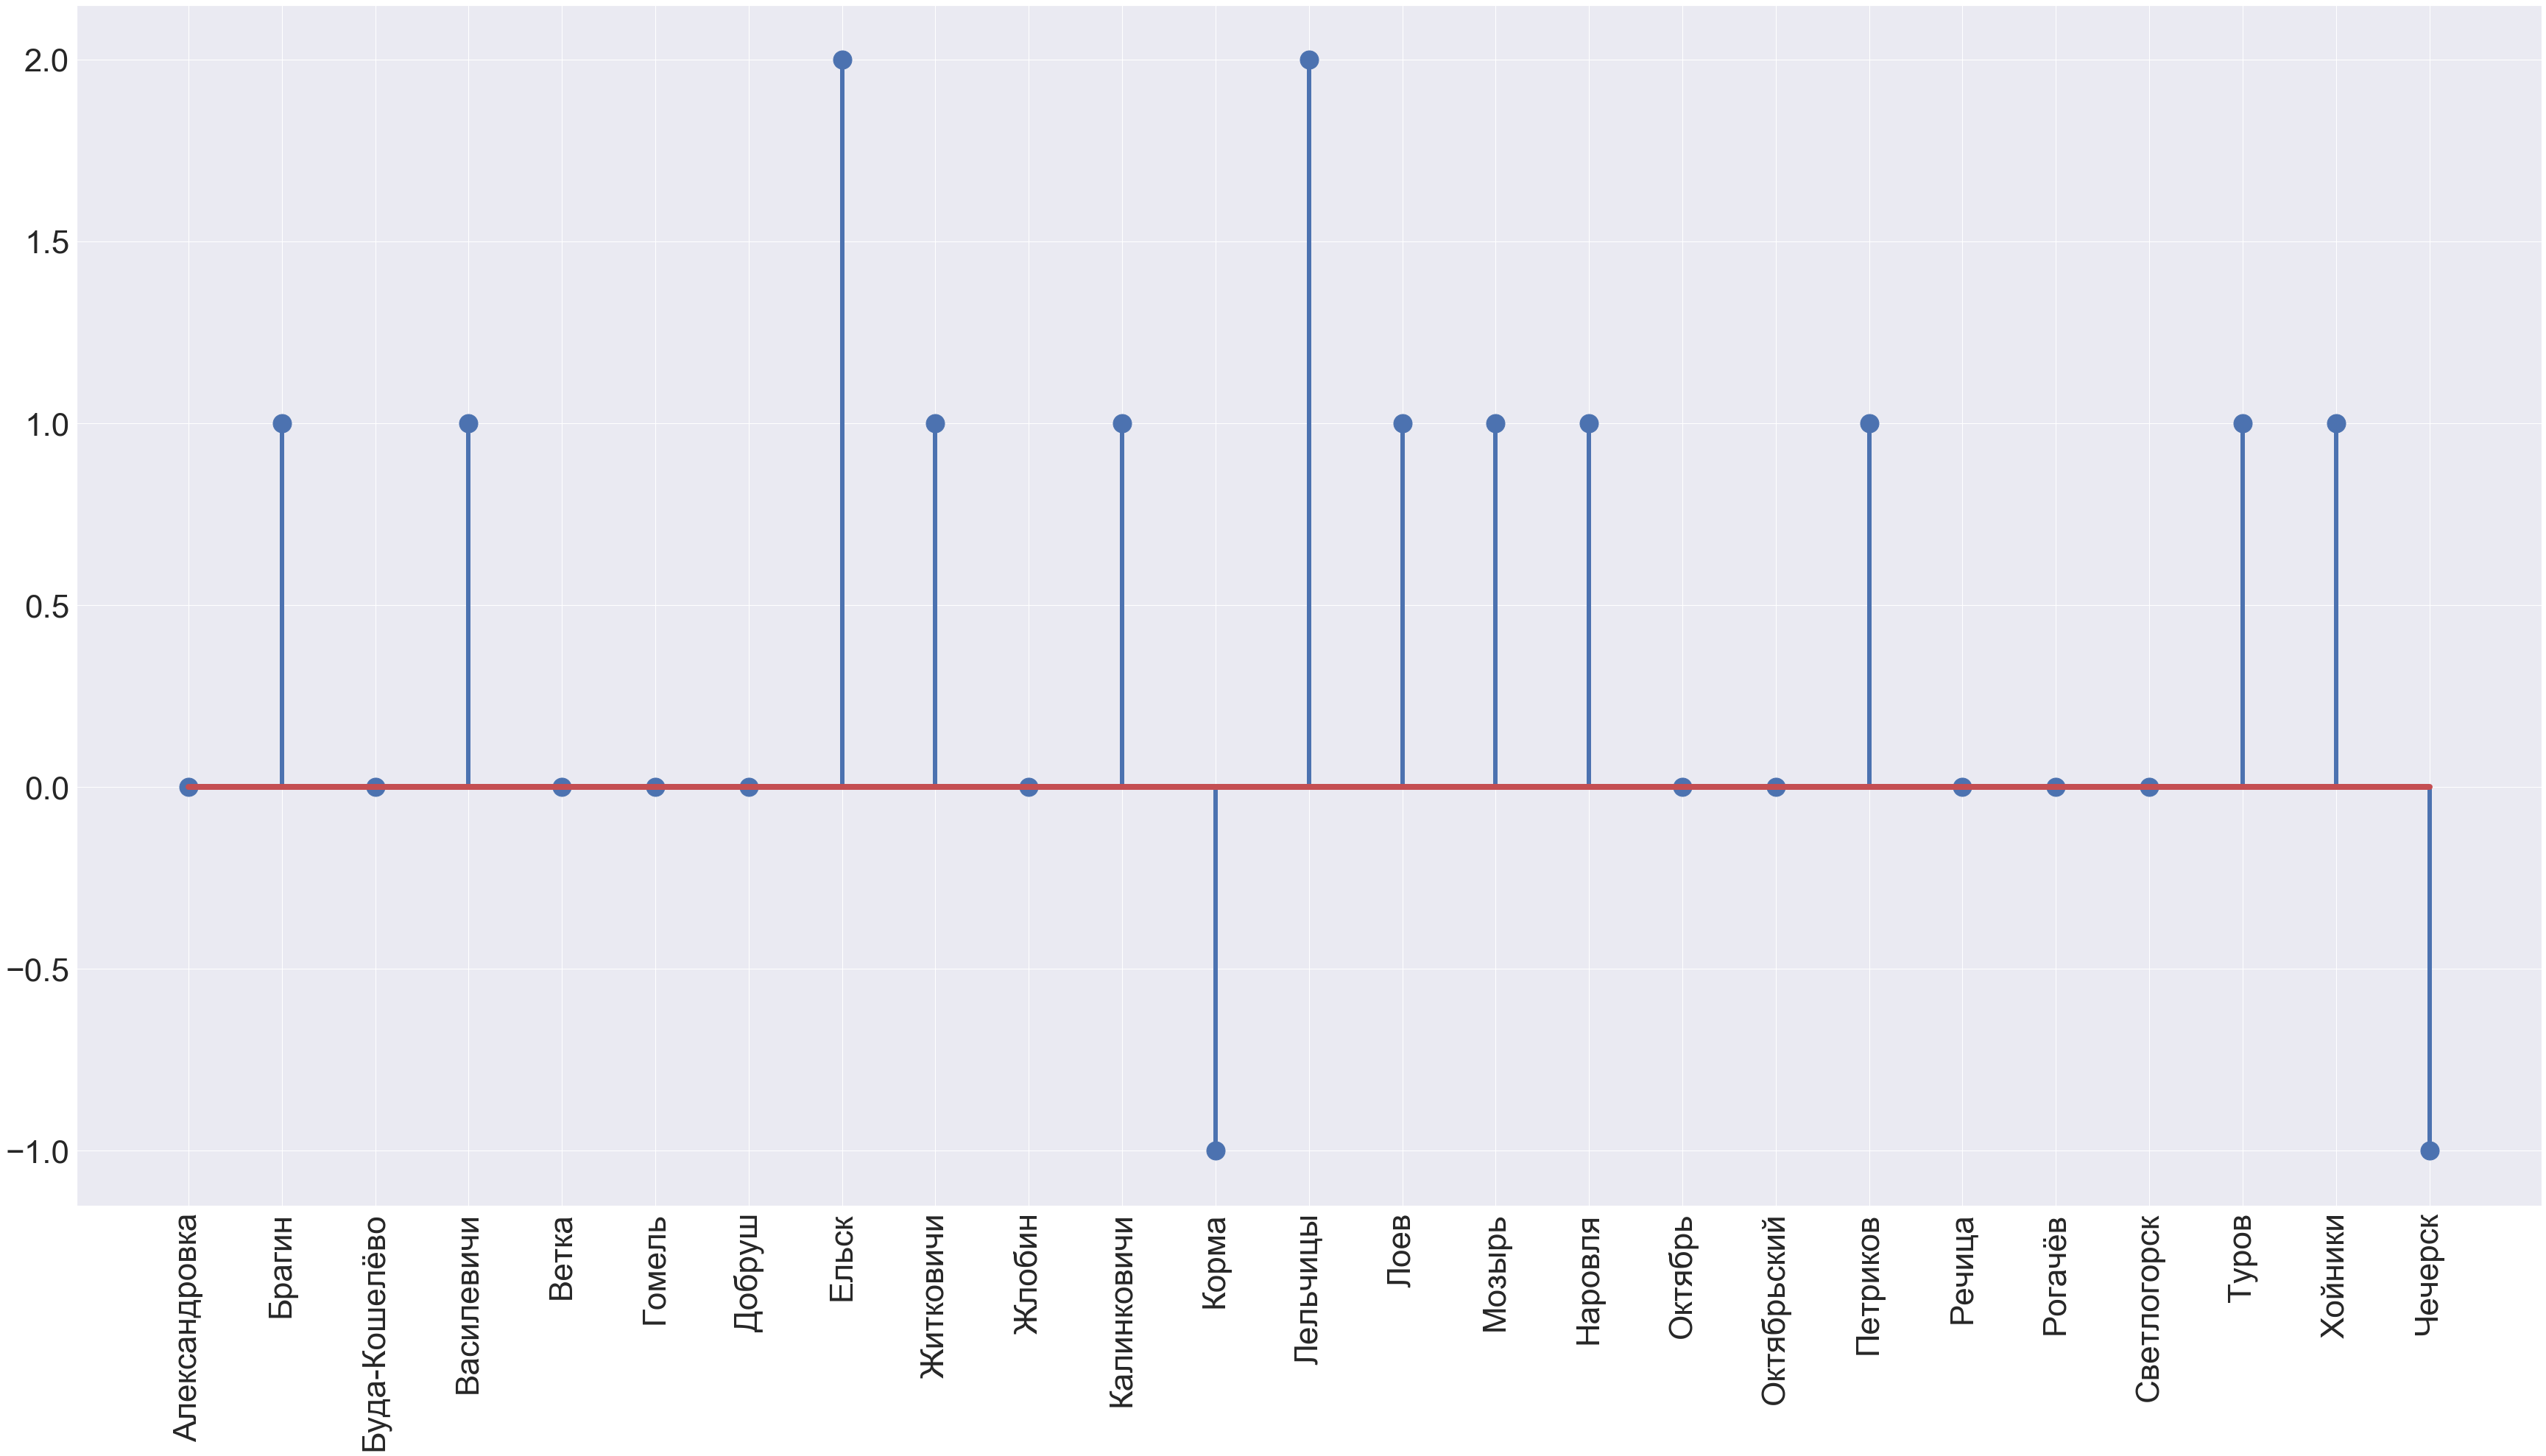

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_gomel = df[df['region'] == 'Гомельская область']

sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(60, 30))
plt.xticks(rotation=90)
(markerLines, stemLines, baseLines) = plt.stem(df_gomel.index, df_gomel['temp'], use_line_collection=True)
plt.setp(markerLines, markersize=25)
plt.setp(stemLines, linewidth=6)
plt.setp(baseLines, linewidth=8)
fig.savefig(f'{main_dir_name}/temp_gomel.png')

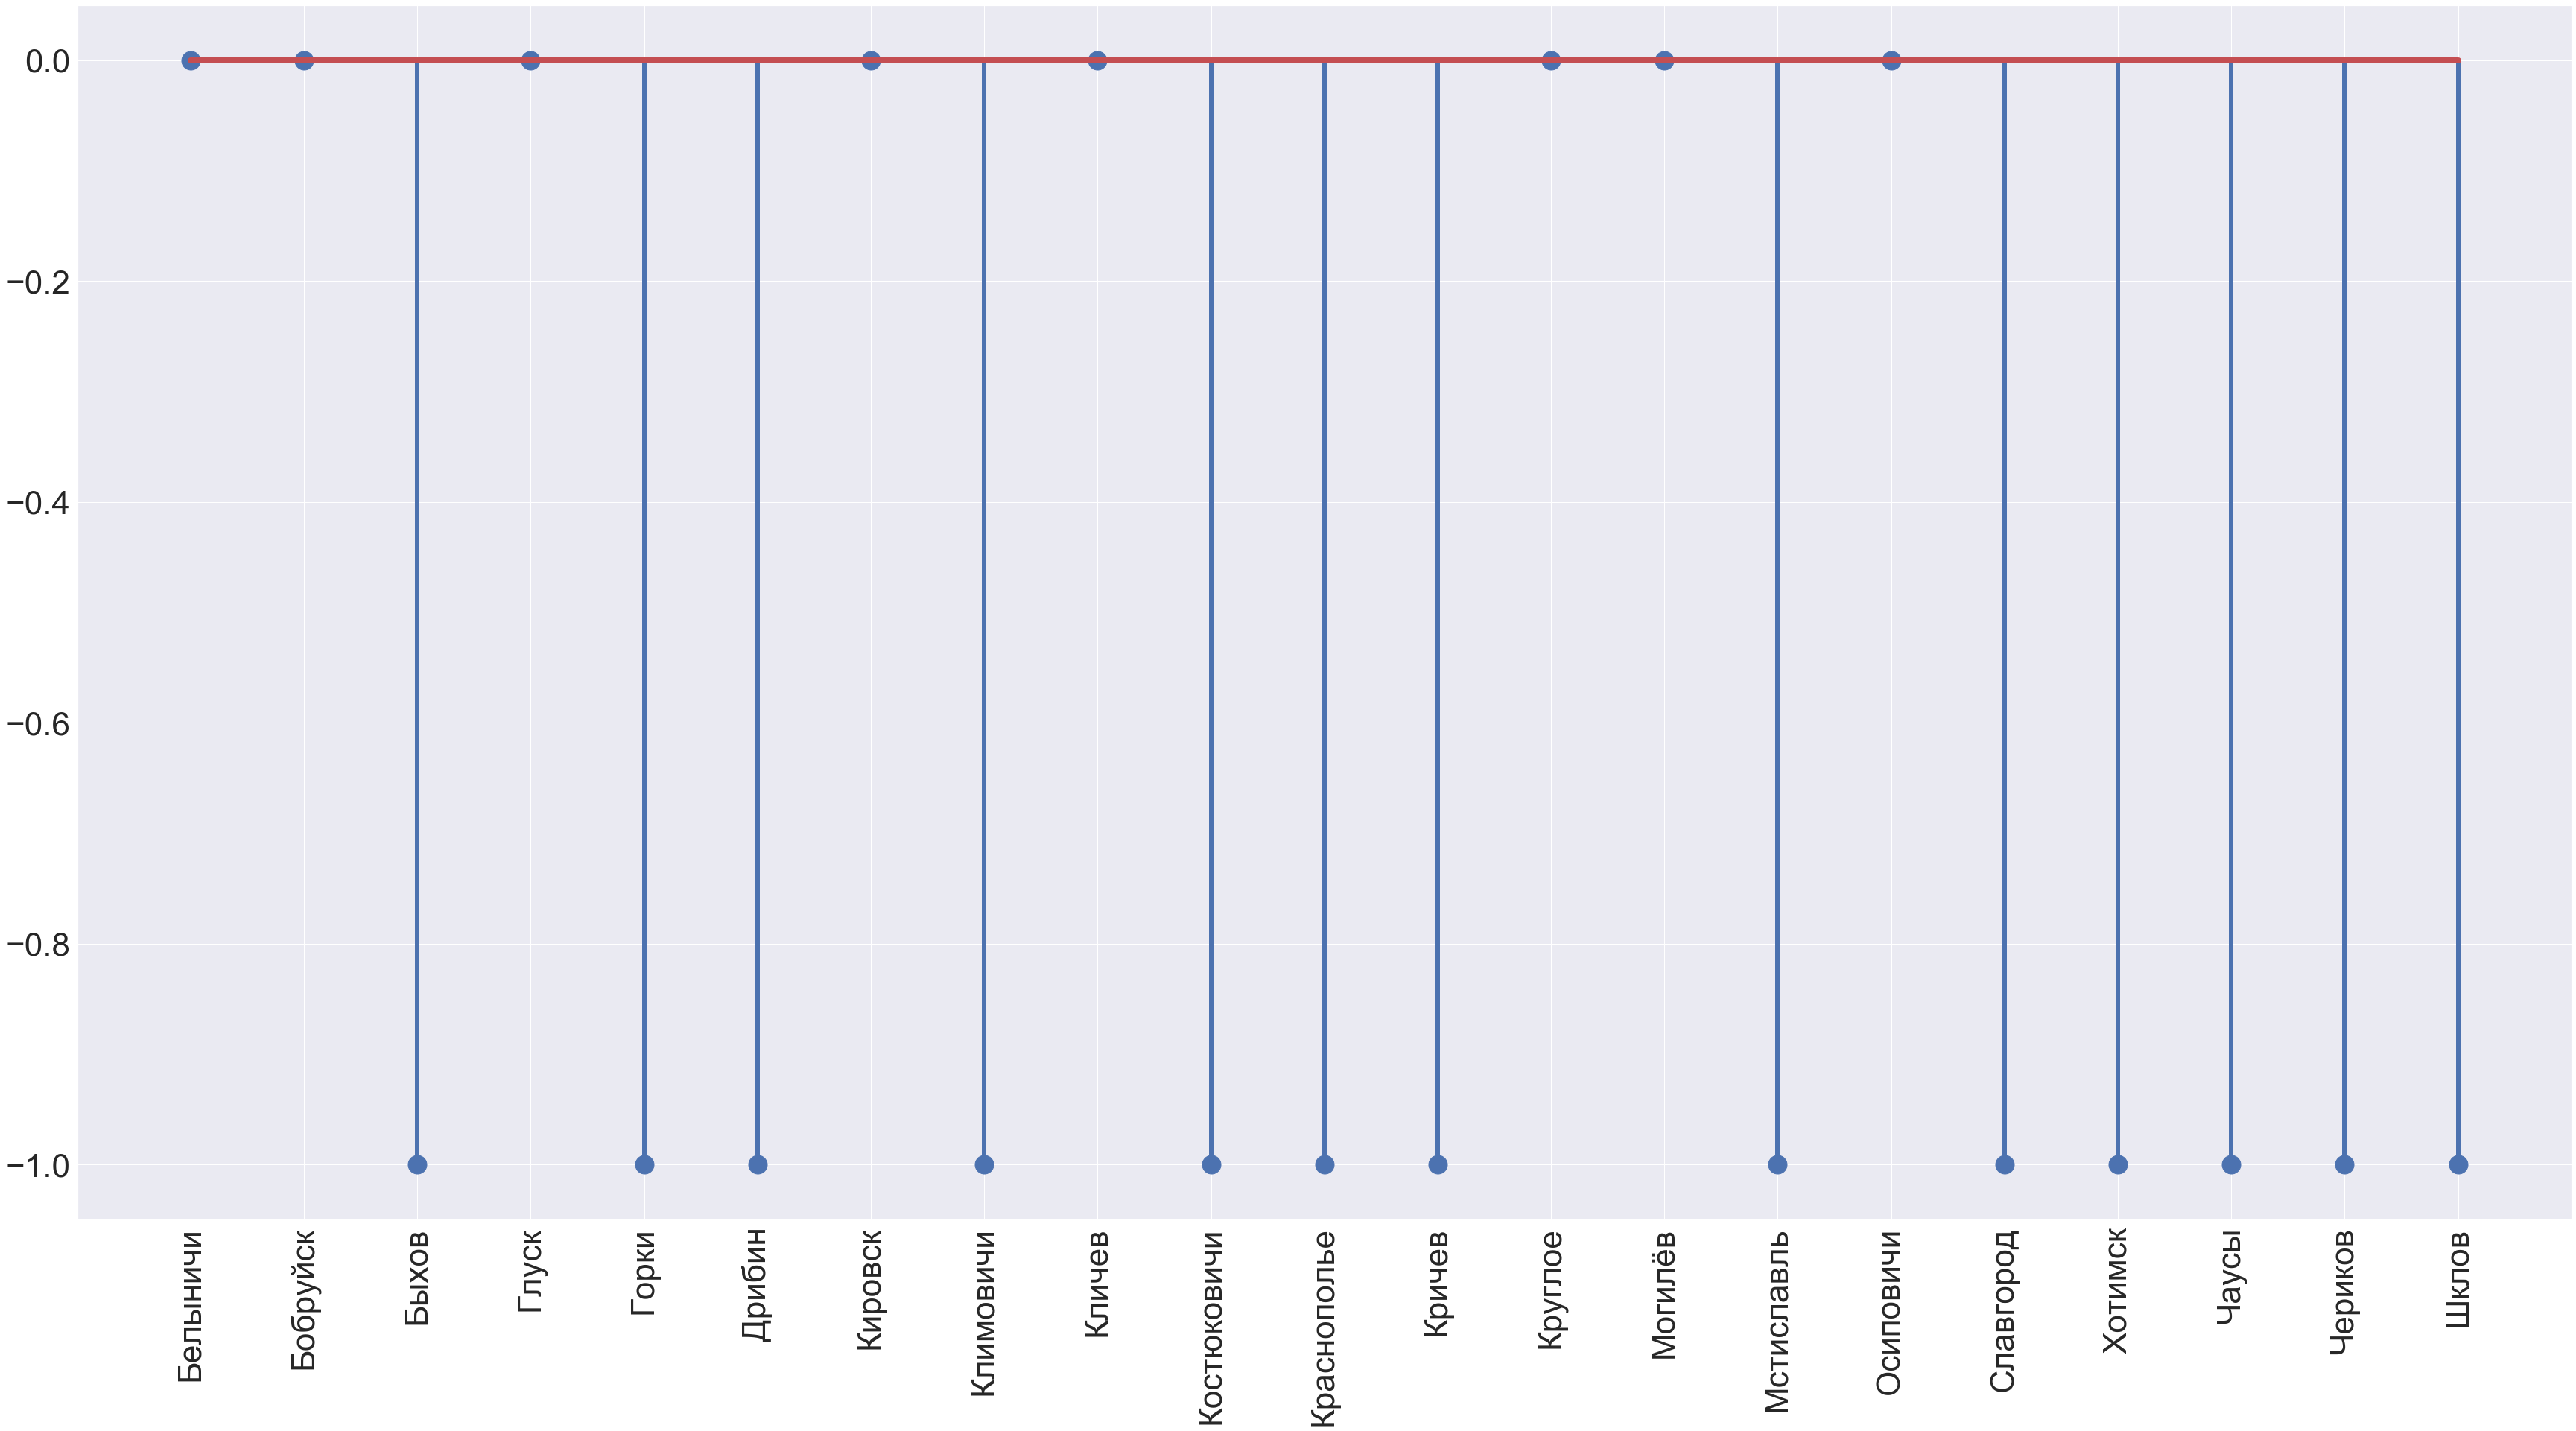

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_mogilev = df[df['region'] == 'Могилёвская область']

sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(60, 30))
plt.xticks(rotation=90)
(markerLines, stemLines, baseLines) = plt.stem(df_mogilev.index, df_mogilev['temp'], use_line_collection=True)
plt.setp(markerLines, markersize=25)
plt.setp(stemLines, linewidth=6)
plt.setp(baseLines, linewidth=8)
fig.savefig(f'{main_dir_name}/temp_mogilev.png')

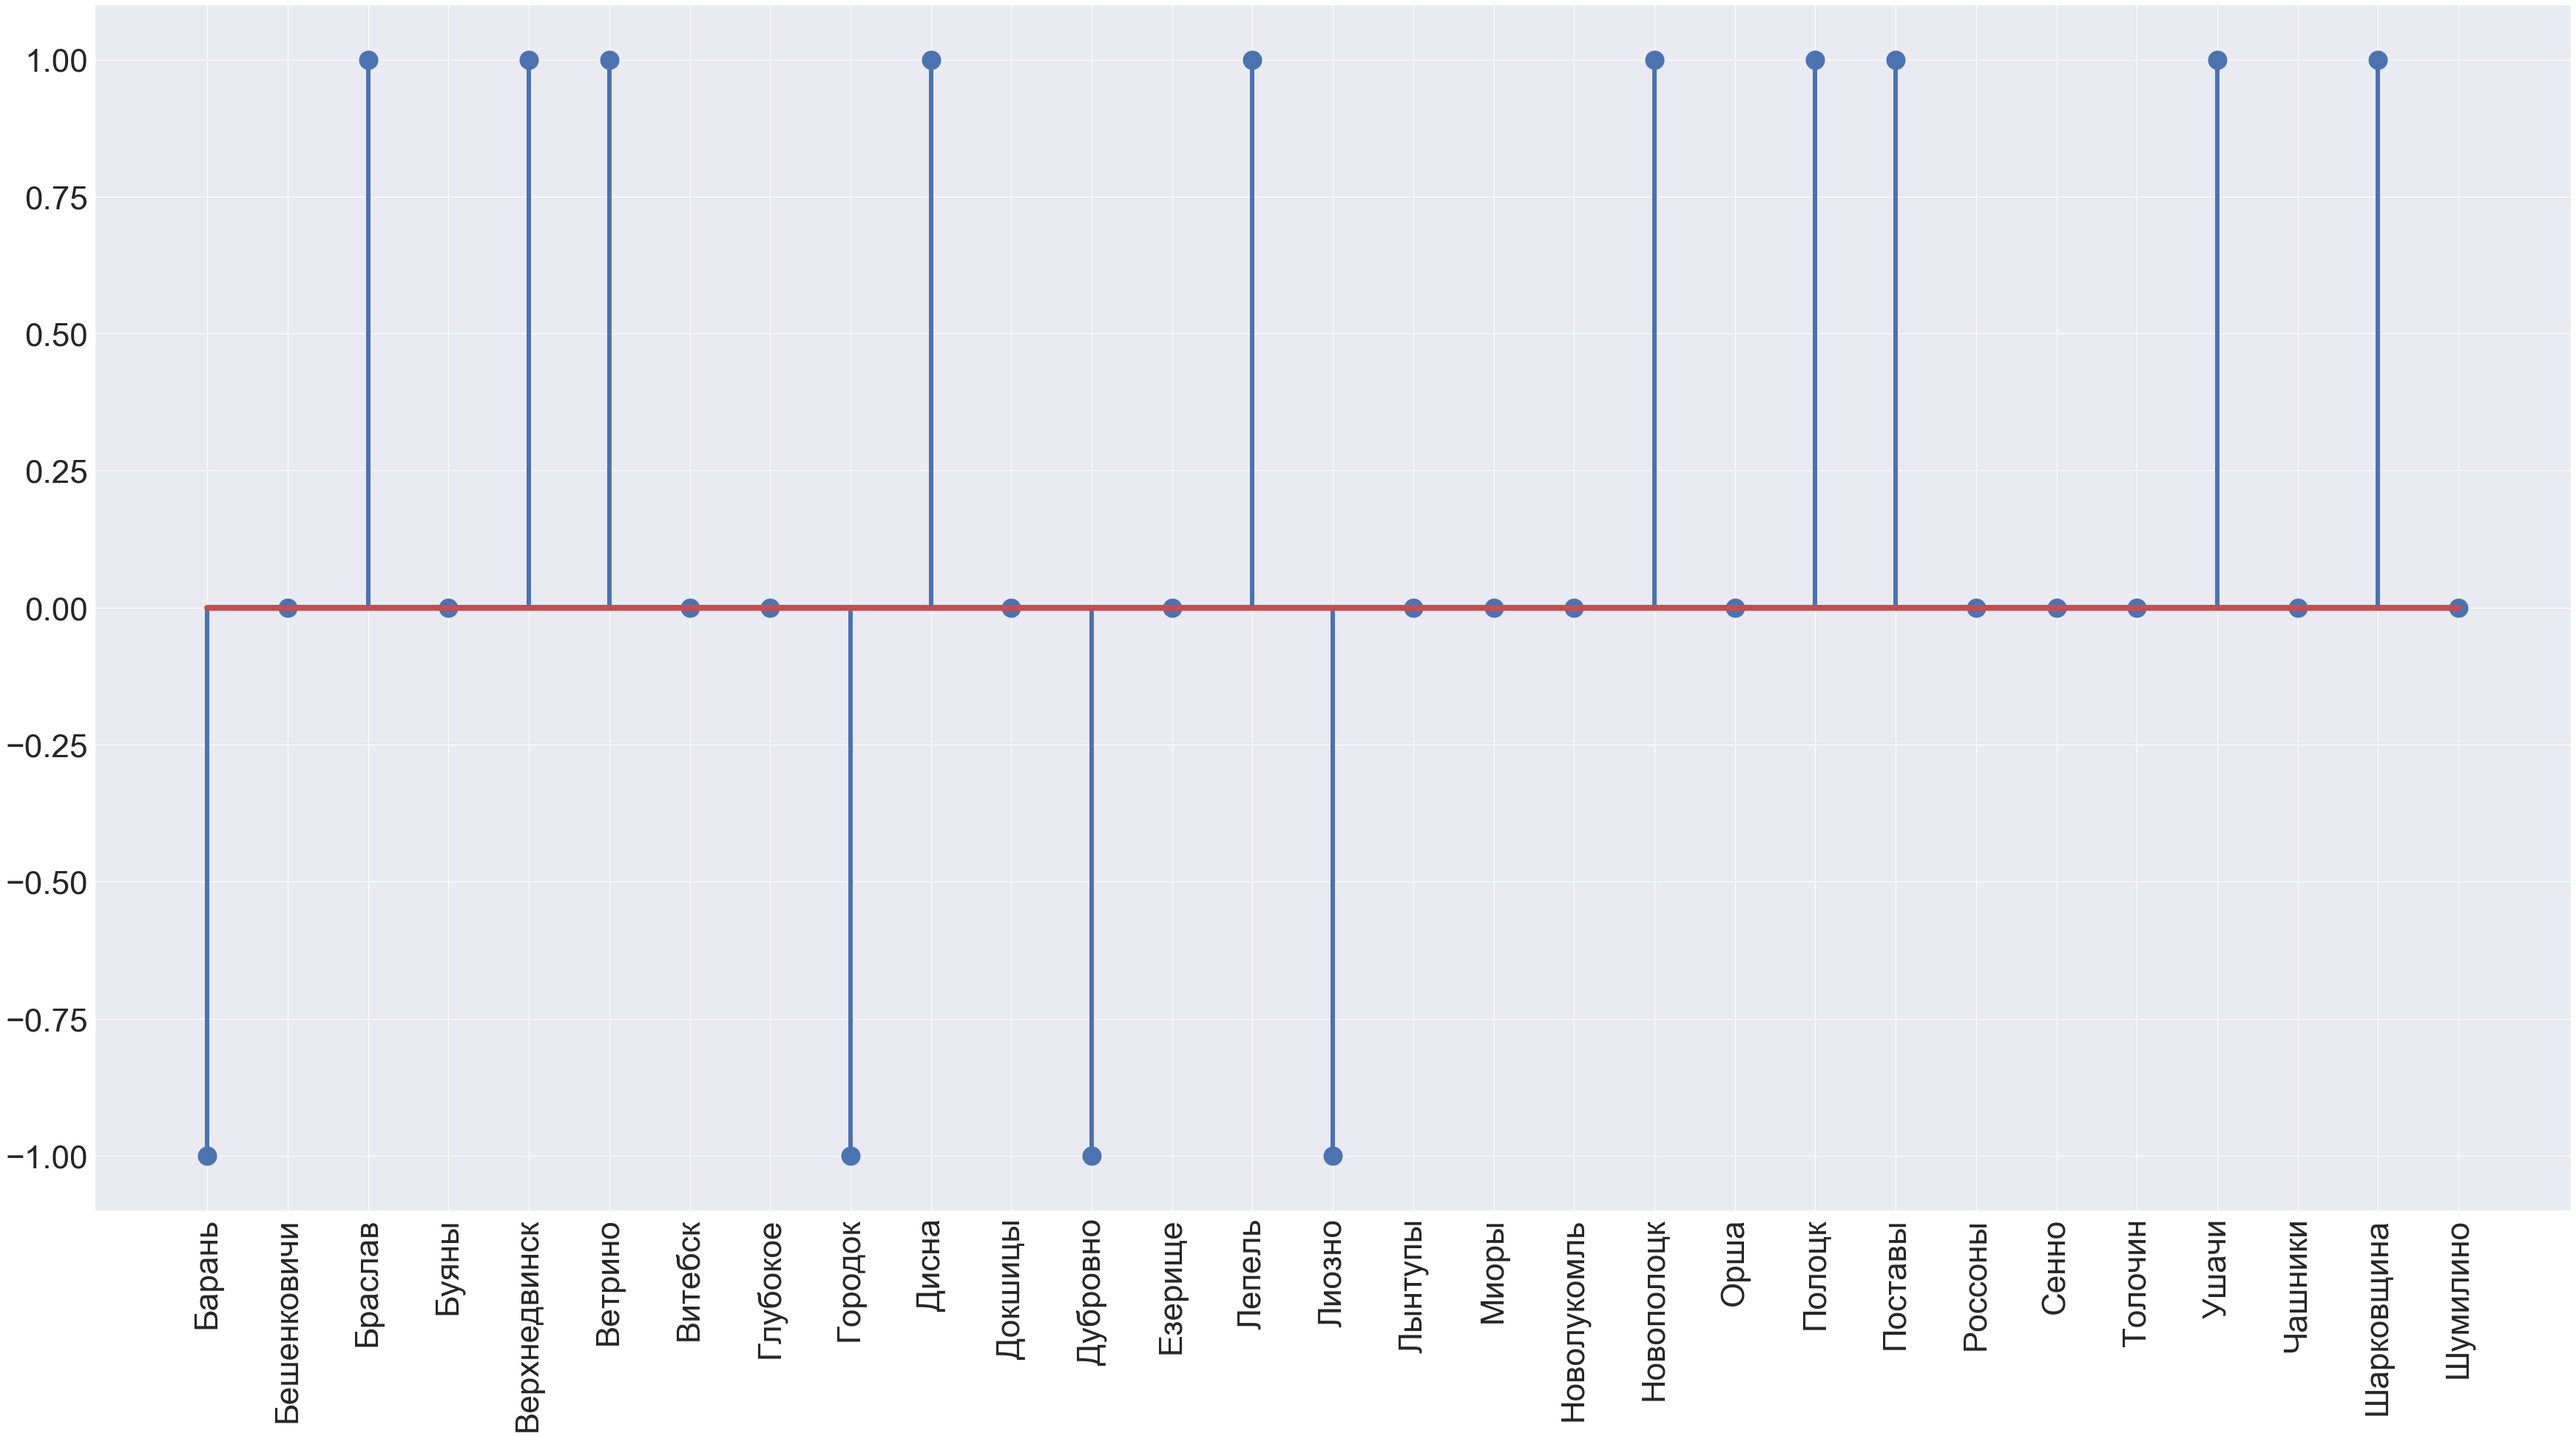

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df_vitebsk = df[df['region'] == 'Витебская область']

sns.set(font_scale=4, style='darkgrid',palette='deep')
fig, ax = plt.subplots(figsize=(60, 30))
plt.xticks(rotation=90)
(markerLines, stemLines, baseLines) = plt.stem(df_vitebsk.index, df_vitebsk['temp'], use_line_collection=True)
plt.setp(markerLines, markersize=25)
plt.setp(stemLines, linewidth=6)
plt.setp(baseLines, linewidth=8)
fig.savefig(f'{main_dir_name}/temp_vitebsk.png')